# Discussion 7️⃣: Model selection and the bias-variance tradeoff
Josh Grossman

<img src="img/graphs.jpg" alt= "xkcd_graphs" width="900" />

Welcome to the seventh discussion of MS&E 125!

In this notebook, we'll discuss the tradeoff between models that do well on 
average across datasets and models that fit the data closely. 
Then, we'll walk through methods to measure model performance and 
make decisions about optimal model complexity. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 🧗 Introduction

Suppose we have a model $y = f(x) + \epsilon$, where $f$ is a model that predicts $y$ from $x$, and $\epsilon$ is a noise term. For example, in simple linear regression, $f(x) = \beta_0 + \beta_1 x$. For a fitted model $\hat{f}$, the mean squared error (in expectation) of the predictions $E[(y - \hat{f}(x))^2]$ can be decomposed into three components: bias, variance, and noise:

\begin{align*}
E[(y - \hat{f}(x))^2] = E[f - \hat{f}(x)]^2 + E[(\hat{f}(x) - E[\hat{f}(x)])^2] + \sigma^2 = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2
\end{align*}

If you are interested in the proof of this, see [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Bias%E2%80%93variance_decomposition_of_mean_squared_error).

Why should we care about this decomposition? Two key ideas:
1. To reduce the MSE of a prediction model $\hat{f}$, you have to decrease its bias and/or
decrease its variance (notice that the noise $\sigma^2$ is independent of $\hat{f}$).
2. For a fixed MSE andn noise level, reducing the bias of the predictions will increase the variance, and vice-versa.

How do we interpret bias and variance in the context of model fitting?

- **Bias**: How closely does our model estimate $\hat{f}$ fit the true model $f$ on average?

- **Variance**: How much does our model estimate $\hat{f}$ vary across datasets?

A picture is worth a thousand words:

<img src="img/bv_tradeoff.png" alt= "bias-variance-tradeoff" width="400" />

Why is this true? Look at some of the models in the intro graphic. Take, for example, the "connect the dots" model. It will always fit any given data perfectly (i.e. bias of 0), but is extremely high in variance because it is very dependent on the exact data points in the available data. 

## 🏘️ Pricing homes in Regressionopolis

The founder of the city of Regressionopolis generates home 
prices via the following linear model:

$$ \text{Price}_i = \$100\text{,}000 + \$200 *\text{Square footage} + \epsilon~\text{, where}~\epsilon \sim N(0,~\$50\text{,}000) $$

The founder's construction company builds 50 homes with a variety of square footage.

The founder then prices the 50 homes with the following Python code, which
the founder does not share with anyone:


In [3]:
# set seed for reproducibility
np.random.seed(0)

# generate 1,000 homes with square footage between 500 and 5,000
n_homes = 50
square_feet = np.random.randint(500, 3000, n_homes)

# generate prices for each home using a linear model
prices = 100_000 + 200 * square_feet + np.random.normal(0, 50_000, n_homes)

# store data in a DataFrame
df = pd.DataFrame({'sq_ft': square_feet, 'price': prices})
df.head()


,sq_ft,price
0,2153,592114.534036
1,1335,427118.992439
2,1263,333233.659130
3,2231,531084.862471
4,1533,354172.351747


### 🏋️ Exercise

As a prospective investor in the real estate market of Regressionopolis,
you're interested in predicting the value of new homes as they are constructed.

You have access to the 50 existing home prices, and you also know their square footage.

You decide to fit three linear regression models to the home price data:

\begin{align}
  \text{Price}_i & = \beta_0 + \epsilon~\text{, where}~\epsilon \sim N(0,\sigma^2) \\
  \text{Price}_i & = \beta_0 + \beta_1 * \text{Square footage} + \epsilon~\text{, where}~\epsilon \sim N(0,\sigma^2) \\
  \text{Price}_i & = \beta_0 + \beta_1 * \text{Square footage} + \beta_2 * \text{Square footage}^2 + \epsilon~\text{, where}~\epsilon \sim N(0,\sigma^2) \\
\end{align}

1. Using `statsmodels`, fit the three models to the home price data. 
How do the fitted coefficients of the models compare to the coefficients of the true data-generating process?

In [4]:
# Your code here!


Intercept    456159.196071
dtype: float64
Intercept    51555.278877
sq_ft          220.305308
dtype: float64
Intercept       -1013.034053
sq_ft             289.847021
I(sq_ft ** 2)      -0.019241
dtype: float64


2. Next, plot the raw data, with square footage on the X-axis and home price on the Y-axis. Plot the fitted models over the raw data.

<AxesSubplot: xlabel='sq_ft', ylabel='price'>

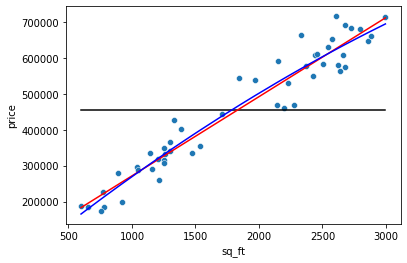

In [5]:
# Your code here!

3. Finally, using the home price data on which the models were trained, calculate the root mean squared error of each model. Which model has the lowest training RMSE?

$$ \text{RMSE} = \sqrt {\sum_{i=1}^n \left(\text{Price}_i - \hat{\text{Price}}_i\right)^2 }$$

In [6]:
# Your code here!

166712.6004326064
43995.908792273396
43377.87349415356


## 🕵️ Assessing your home price models

The founder of Regressionopolis decides to build and price 50 more homes. 
The founder builds and prices the new homes with the following Python code:

In [7]:
# set seed for reproducibility
# new seed this time so we don't get the same 50 prices as before
np.random.seed(2)

# function for generating home sq. ft. and price data
def generate_data(n_homes):
    # generate 1,000 homes with square footage between 500 and 5,000
    square_feet = np.random.randint(500, 3000, n_homes)

    # generate prices for each home using a linear model
    # Note: Python ignores underscores in numbers, so we can use them to make
    # large numbers more readable
    prices = 100_000 + 200 * square_feet + np.random.normal(0, 50_000, n_homes)

    # store data in a DataFrame
    df = pd.DataFrame({'sq_ft': square_feet, 'price': prices})

    return df

new_df = generate_data(50)

new_df.head()

,sq_ft,price
0,2108,531357.452614
1,2847,745192.045638
2,1599,422746.942581
3,2908,711846.730124
4,1174,323788.720976


It's time to see which of our home price models predicted home prices
most accurately on the new data!

### 🏋️ Exercise

1. What's the RMSE of your original three models on the new home price data? 
In other words, what's the RMSE on the testing data?

In [8]:
# Your code here!

160628.16303793548
52614.45590380112
55026.5728690818


2. Re-fit the three linear models on the combined data of 100 total homes and
print the new coefficients.

> It's common to improve existing models by incorporating new data.

In [9]:
# Your code here!

Intercept    450235.36999
dtype: float64
Intercept    64982.310788
sq_ft          213.810915
dtype: float64
Intercept        71039.591855
sq_ft              205.626575
I(sq_ft ** 2)        0.002298
dtype: float64


3. Plot the combined raw data and the three newly fitted models. 

<AxesSubplot: xlabel='sq_ft', ylabel='price'>

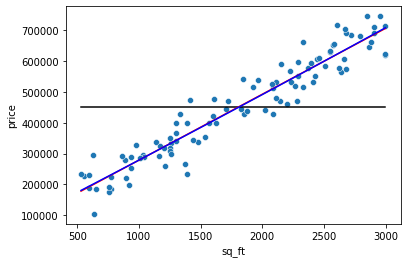

In [10]:
# Your code here!

4. Which model changed the most with the new data included (i.e., which model has the highest variance)? Which one changed the least? 

> You may find it helpful to print the parameters of the original models and the new models for a side-by-side comparison.

In [11]:
# Your code here!

Intercept    456159.196071
dtype: float64
Intercept    450235.36999
dtype: float64
Intercept    51555.278877
sq_ft          220.305308
dtype: float64
Intercept    64982.310788
sq_ft          213.810915
dtype: float64
Intercept       -1013.034053
sq_ft             289.847021
I(sq_ft ** 2)      -0.019241
dtype: float64
Intercept        71039.591855
sq_ft              205.626575
I(sq_ft ** 2)        0.002298
dtype: float64


## 🧪 Train, validate, test

In the example above, we knew the data generating process (DGP). In real life, we don't know the DGP.

If we don't know the DGP, how are we supposed to know which of our models will (most likely) perform best on the test data?

### The validation set

By splitting our training data into two parts (training data and validation data), we can estimate how we our trained models will perform on unforeseen data (the test data). A visual:

<img src="img/train-validate-test-split.png" alt= "xkcd_graphs" width="900" />

Here's the basic idea:

- The training set is used to fit as many models as you'd like.
- The validation set is used to estimate how well those models will do on unforeseen data. We can validate as much as we like.
- The test set is our one and only chance to see how well our model performs. It cannot be used in model construction or validation.

Here are the steps to choosing a model:
1. Randomly split our initial set of 50 homes into 30 training data points, and 20 validation data points.
2. We will fit our three linear models on the 30 training data points, and then see how well they perform on the 20 validation points.
3. After we find the model that performs best on the validation set, we re-train our chosen model on the full data, and use that as our one and only shot with the testing data.

In [52]:
# split the original data of 50 homes (df) into 30 training homes and 20 validation homes.
train_df = df.sample(30)
val_df = df.drop(train_df.index)

# train the three linear models on the training set
train_model1 = smf.ols('price ~ 1', data=train_df).fit()
train_model2 = smf.ols('price ~ 1 + sq_ft', data=train_df).fit()
train_model3 = smf.ols('price ~ 1 + sq_ft + I(sq_ft**2)', data=train_df).fit()

# calculate the validation set RMSE of the three models
print(np.sqrt(np.mean((val_df.price - train_model1.predict(val_df))**2)))
print(np.sqrt(np.mean((val_df.price - train_model2.predict(val_df))**2)))
print(np.sqrt(np.mean((val_df.price - train_model3.predict(val_df))**2)))

# If you re-run the code several times, the slope+intercept model often has 
# the lowest validation set RMSE, but not always.


157825.13079089113
41110.54122062717
41735.954061833756


## 

### 💵 Getting more bang for your buck with k-fold cross validation

When estimating the validation set RMSE, we
were only able to use models trained on 30 data points. 

If we have access to 50 data points, we might as well leverage knowledge
from all 50 data points! 

Furthermore, it would be nice if our results didn't suffer from random variation
induced from sampling 30 random points. 

Enter cross validation:

<img src="img/cross-validation.png" alt= "xkcd_graphs" width="900" />

The basic idea of K-fold cross validation:
1. Randomly split your training data into k folds, or splits. In the picture above, k=5.
2. Train your model on all folds except the 1st fold. 
3. Calculate the RMSE of the model using the 1st fold as the validation set.
4. Repeat steps 2 and 3 using the 2nd, 3rd, 4th, and 5th folds as the held-out fold.
5. Average the RMSE across the five held-out folds to get a more stable estimate of the test RMSE.

In [57]:
# Split the original data (df) into three folds after shuffling the data.
# We use three folds here since the data is small.
folds = np.array_split(df.sample(n_homes), 3)

# For each held out fold, train the three linear models on the remaining
# four folds, calculate the validation RMSE on the held out fold,
# and store the results in a list.
rmse_list = []
for i in range(3):
    # get the held out fold
    val_df = folds[i]
    
    # get the other four folds
    train_df = pd.concat(folds[:i] + folds[i+1:])
    
    # train the three linear models on the training set
    train_model1 = smf.ols('price ~ 1', data=train_df).fit()
    train_model2 = smf.ols('price ~ sq_ft', data=train_df).fit()
    train_model3 = smf.ols('price ~ sq_ft + I(sq_ft**2)', data=train_df).fit()
    
    # calculate the validation set RMSE of the three models
    rmse1 = np.sqrt(np.mean((val_df.price - train_model1.predict(val_df))**2))
    rmse2 = np.sqrt(np.mean((val_df.price - train_model2.predict(val_df))**2))
    rmse3 = np.sqrt(np.mean((val_df.price - train_model3.predict(val_df))**2))
    
    # store the results in a list
    rmse_list.append([rmse1, rmse2, rmse3])

# Finally, average the model performance across the five folds.
# If you repeatedly run this code, you'll find that the slope+intercept model
# tends to perform best.
rmse_df = pd.DataFrame(rmse_list, columns=['intercept only', 'intercept+slope', 'quadratic'])
rmse_df.mean()

intercept only     171559.223366
intercept+slope     45693.492039
quadratic           45771.944076
dtype: float64